# Matplotlib y Seaborn

### Objetivo de la Clase

**Capacitar a los estudiantes en el uso de Matplotlib y Seaborn para la visualización de datos, enfocándose en la presentación de estadísticas y resultados en la ciencia de datos.**

---

### Agenda

### 1. Introducción

- **Importancia de la visualización de datos**
    - Explicar cómo una buena visualización puede revelar insights que no son obvios solo con estadísticas.
- **Breve introducción a Matplotlib y Seaborn**
    - Matplotlib es más customizable pero más verboso.
    - Seaborn es más fácil de usar y estéticamente más agradable pero menos customizable.

### 2. Matplotlib Básico

- **Instalación y configuración**

In [106]:
# !pip install matplotlib seaborn
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Ejemplo sencillo

Matplotlib gráfica nuestros datos en `Figure`s (Ventanas, widgets, etc) cada uno de los cuales puede contener uno o más `Axes`, Un área donde los puntos se pueden especificar en términos de coordenadas x-y (o theta-r en un gráfico polar, x-y-z en un gráfico 3D). La forma más sencilla de crear una figura es usar `pyplot.subplots`. A continuación, podemos utilizar `Axes.plot` para dibujar algunos datos en los "Axes".  

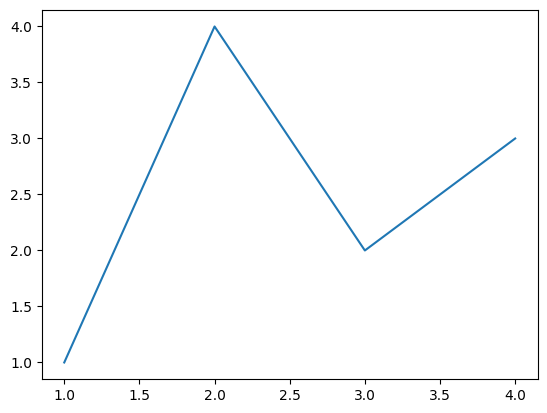

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

#### Tipos de entradas para las funciones de trazado
Las funciones de trazado esperan por defect `numpy.array` o `numpy.ma.masked_array` como input, también recibe objetos que pueden ser pasados a `numpy.asarray`.
Las clases que son similares a los arrays (array-like) como los objetos de `pandas` o las `numpy.matrix` podrían no funciónar según lo previsto. La convención común es convertirlos en objetos del tipo `numpy.array` antes de trazar. Por ejemplo,  para convertir un `numpy.matrix`.   

In [4]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

La mayoría de los métodos también analizarán un objeto indexable por cadenas, como un tipo `dict`, un `numpy.array` estructurado, o un `pandas.DataFrame`. Matplotlib permite proporcionar el argumento de la palabra clave y generar los gráficos pasando la cadena correspondiente para las variables *x* y *y*. 

Text(0, 0.5, 'entry b')

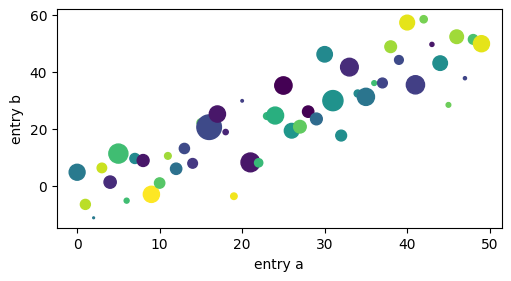

In [5]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

#### Interfaces explicitas e implicitas

Existen dos formas de usar matplotlib:

* Crear explicitamente las figuras y los ejes (`fig`, `ax`), y llamar métodos en ellos (estilo orientado a objetos (OO))


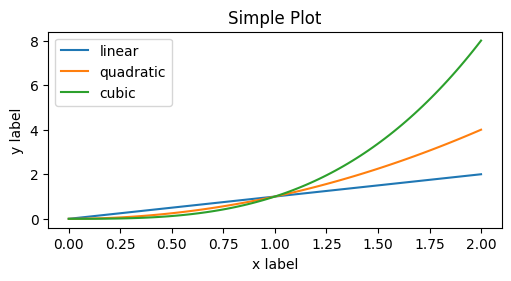

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

* Usar pyplot para crear y administrar figuras y ejes, se pueden utilizar las funciones de pyplot para trazar.

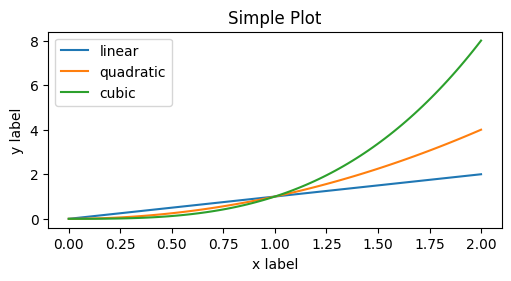

In [7]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

#### Crear funciones auxiliares
Si se requiere hacer gráficos una y otra vez con diferentes datasets, o desea envolver fácilmente los métodos de matplotlib, se puede utilizar funciones:

In [8]:
def plotter(ax, data1, data2, param_dict):
    """
    Función de ayuda para gráficos
    """
    out = ax.plot(data1,data2, **param_dict)
    return out

para luego llamar dos veces una y gráficar dos subplots:

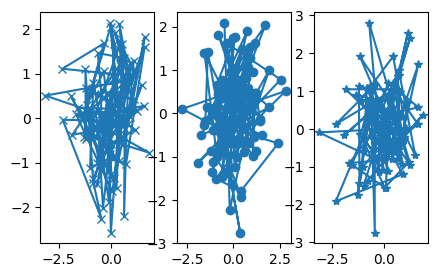

In [9]:
data1, data2, data3, data4 = np.random.randn(4,100)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (5,3))
plotter(ax1, data1,data2, {'marker':'x'})
plotter(ax2, data3,data4, {'marker':'o'})
plotter(ax3, data1,data3, {'marker':'*'})

puedes consultar los tipos de marcadores en el siguiente [enlace](https://matplotlib.org/stable/api/markers_api.html)

#### Estilos
Muchos de los gráficadores tienen opciones de estilo, accesibles ya sea cuando se llama el método de plot, o con un 'setter' que asigna el atributo.

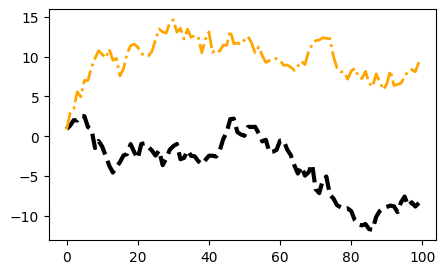

In [10]:
fig, ax = plt.subplots(figsize = (5,3))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color = (0,0,0) , linewidth = 3, linestyle = '--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle('dashdot')

##### Color
Consulta los estilos de linea en el siguiente [enlace](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) y los colores a continuación y en el siguiente [enlace](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def)

In [11]:
# matplotlib.colors.BASE_COLORS
# matplotlib.colors.TABLEAU_COLORS
# matplotlib.colors.CSS4_COLORS
# matplotlib.colors.XKCD_COLORS

Algunos tipos de plot tomarán varios colores. Por ejemplo, para un `scatter plot`, el borde de los marcadores puede ser de diferentes colores Desde el interior:

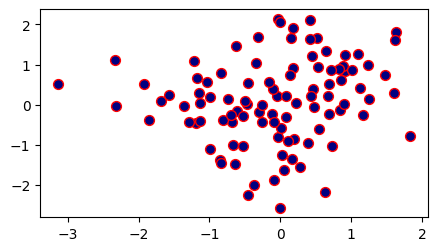

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor=(0,0,.5), edgecolor='r')

##### Anchos de linea, estilos de linea y tamaños del marcador
Los anchos de línea suelen estar en puntos tipográficos (1 pt = 1/72 pulgada) y disponible para artistas que tienen líneas trazadas. Del mismo modo, líneas trazadas puede tener un estilo de línea.

El tamaño del marcador depende del método utilizado. `plot` especifica markersize en puntos, y es generalmente el "diámetro" o ancho de la marcador. `scatter` especifica markersize como aproximadamente proporcional al área visual del marcador. Hay una serie de marcadores estilos disponibles como códigos `string` ([enlace](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers))

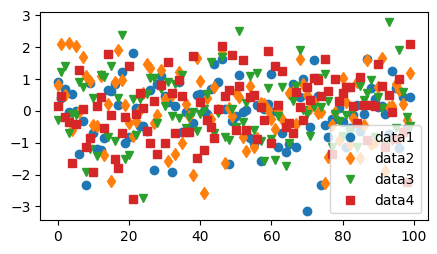

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

#### Etiquetado

##### Etiquetas y anotaciones

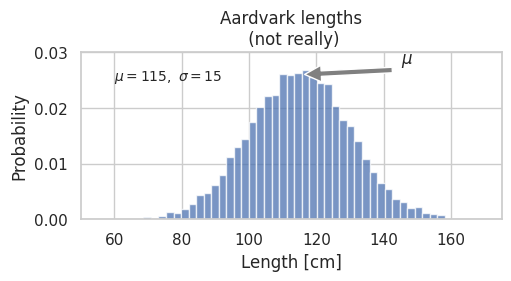

In [76]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(60,0.025,'$\mu=115,\ \sigma=15$',fontsize = 10)
ax.axis([50, 175, 0, 0.03])
ax.annotate("$\mu$",xy = (mu,0.026), xytext = (mu+30,0.028), arrowprops=dict(facecolor = "gray", shrink = 0.05))
ax.grid(True)

##### Leyendas

Otra forma de identificar lineas y marcadores es con [`Axes.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend)

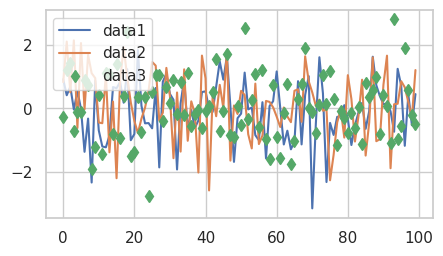

In [80]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend(loc = 'upper left')

#### Escalas y ticks de eje


##### [Escala](https://matplotlib.org/stable/gallery/scales/scales.html)
Además de la escala lineal, Matplotlib suministra escalas no lineales, como una escala logarítmica. Dado que las escalas logarítmicas se usan tanto, también hay métodos directos como `loglog`,`semilogx`, y `semilogy`. Aquí ponemos la escala manualmente:

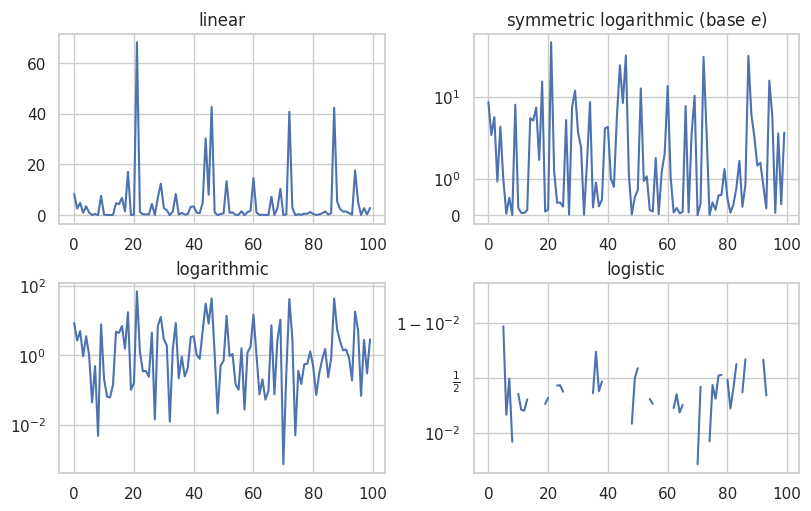

In [96]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0,0].plot(xdata, data)
axs[0,0].set_title('linear')
axs[1,0].set_yscale('log')
axs[1,0].plot(xdata, data)
axs[1,0].set_title('logarithmic')
axs[0,1].set_yscale('symlog')
axs[0,1].plot(xdata, data)
axs[0,1].set_title('symmetric logarithmic (base $e$)')
axs[1,1].set_yscale('logit')
axs[1,1].plot(xdata, data)
axs[1,1].set_title('logistic');


##### Etiquetas
Cada eje tiene un localizador de ticks y un formateador que eligen dónde a lo largo del Objetos de eje para colocar marcas de graduación. Una interfaz simple para esto es `set_xticks`:


Text(0.5, 1.0, 'Manual ticks')

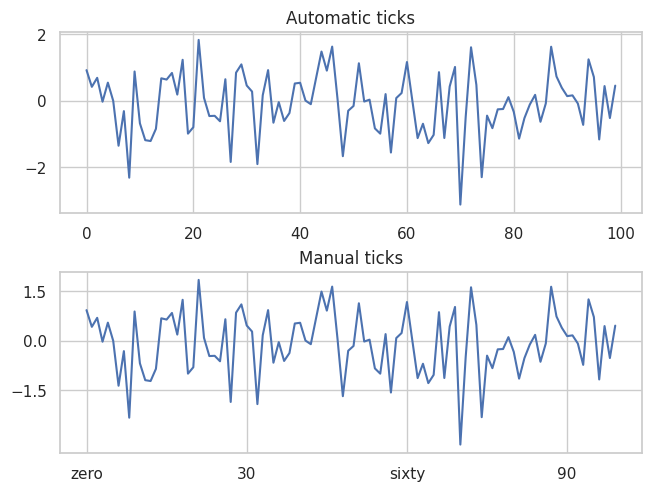

In [104]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty','90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

##### Etiquetas de fecha

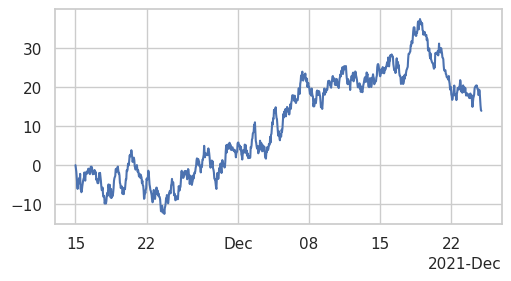

In [117]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

##### Ejes secundarios

Text(0.5, 0, 'Angle [°]')

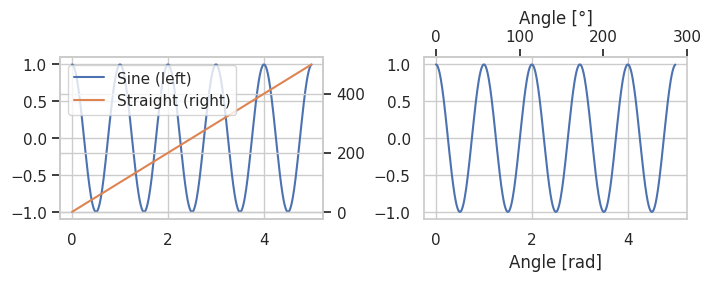

In [119]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

##### Colormap
A menudo queremos tener una tercera dimensión en una trama representada por un color en un [mapa de colores](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps). Matplotlib tiene una serie de tipos de tramas que hacen esto:

$$
Z(x,y) = (1-\frac{x}{2}+x^5+y^3)e^{(-x^2-y^2)}
$$

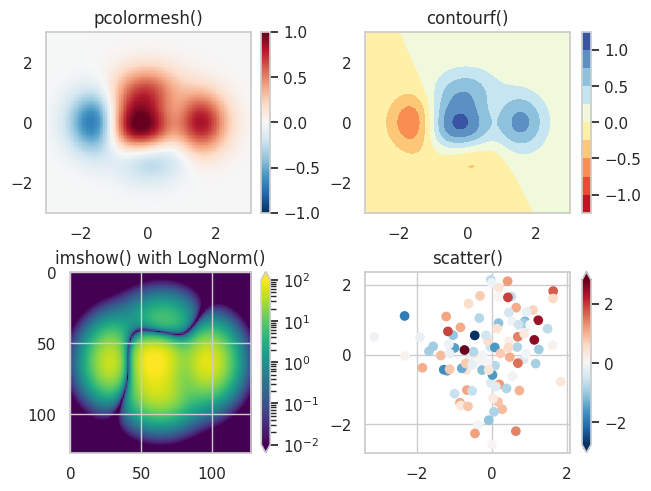

In [130]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11), cmap='RdYlBu')
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='viridis',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')
plt.show()

##### Datos pareados
son gráficos del tipo par $(x,y)$, tabular $(var_1,...,var_n)$, y datos de función $f(x) = y$ 

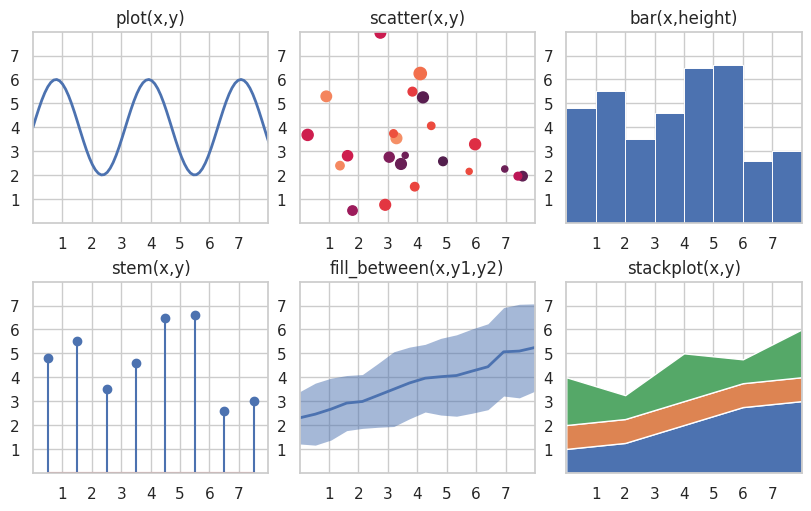

In [144]:
fig, ax = plt.subplots(2,3, figsize = (8,5), layout='constrained')
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)
ax[0,0].plot(x, y, linewidth=2.0)

ax[0,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "plot(x,y)")




np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

ax[0,1].scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax[0,1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "scatter(x,y)")


x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

ax[0,2].bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax[0,2].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8),title = "bar(x,height)")

# make data
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

ax[1,0].stem(x, y)

ax[1,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "stem(x,y)")

x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

ax[1,1].fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax[1,1].plot(x, (y1 + y2)/2, linewidth=2)

ax[1,1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = 'fill_between(x,y1,y2)')

# make data
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

ax[1,2].stackplot(x, y)

ax[1,2].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "stackplot(x,y)")
plt.show()

##### Distribuciones estadísticas
Gráficos de la distribución de al menos una variable en un conjunto de datos. Algunos de estos Los métodos también calculan las distribuciones.

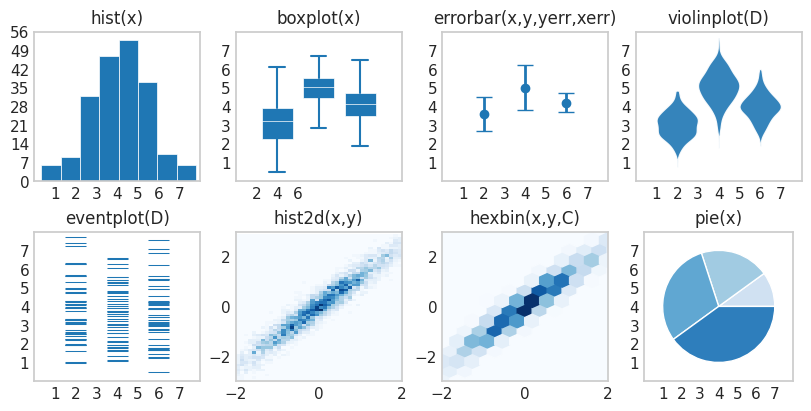

In [162]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery-nogrid')

fig, ax = plt.subplots(nrows = 2, ncols = 4, layout = "constrained", figsize=(8,4))
# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

ax[0,0].hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax[0,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9),title = "hist(x)")

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))


VP = ax[0,1].boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax[0,1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "boxplot(x)")

# make data:
np.random.seed(1)
x = [2, 4, 6]
y = [3.6, 5, 4.2]
yerr = [0.9, 1.2, 0.5]


ax[0,2].errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

ax[0,2].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "errorbar(x,y,yerr,xerr)")


# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))

vp = ax[0,3].violinplot(D, [2, 4, 6], widths=2,
                   showmeans=False, showmedians=False, showextrema=False)
# styling:
for body in vp['bodies']:
    body.set_alpha(0.9)
ax[0,3].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "violinplot(D)")



# make data:
np.random.seed(1)
x = [2, 4, 6]
D = np.random.gamma(4, size=(3, 50))


ax[1,0].eventplot(D, orientation="vertical", lineoffsets=x, linewidth=0.75)

ax[1,0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "eventplot(D)")

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3



ax[1,1].hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))

ax[1,1].set(xlim=(-2, 2), ylim=(-3, 3),title = "hist2d(x,y)")




# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3


ax[1,2].hexbin(x, y, gridsize=20)

ax[1,2].set(xlim=(-2, 2), ylim=(-3, 3), title ="hexbin(x,y,C)")

x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

ax[1,3].pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax[1,3].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8), title = "pie(x)")


plt.show()

### 4. Seaborn Básico

- **Instalación y configuración**

In [163]:
# Instalar e importar
# !pip install seaborn
import seaborn as sns

In [164]:
# Aplicar tema
sns.set_theme()

In [165]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


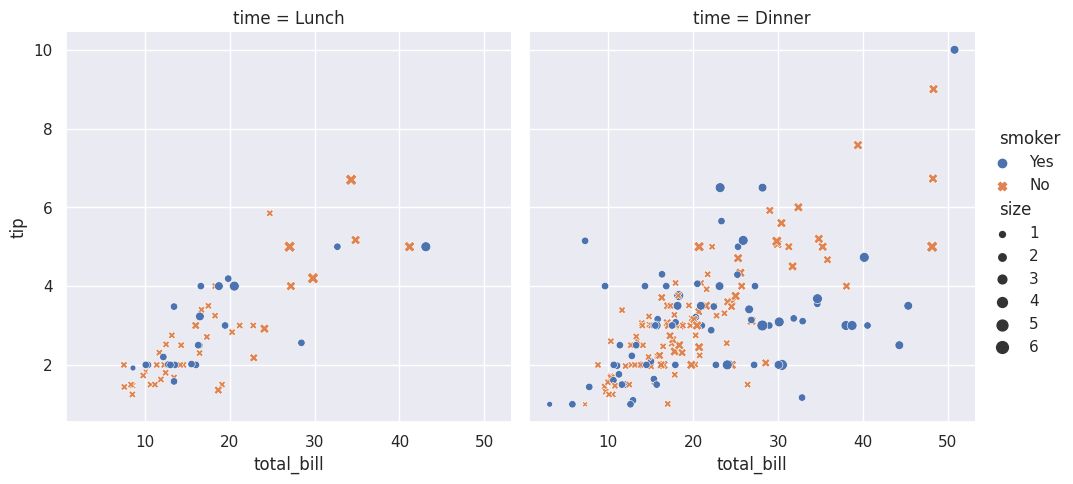

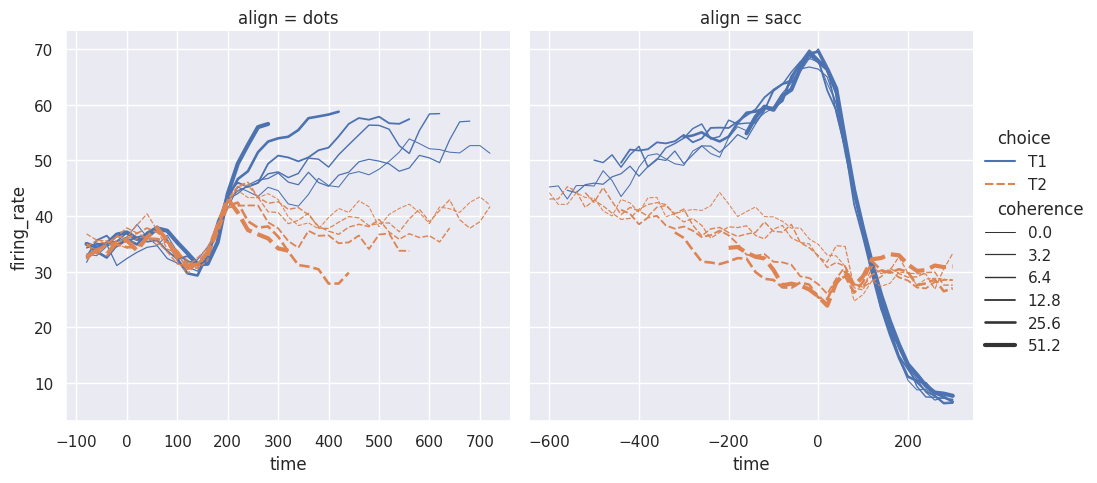

In [171]:
# Crear una visualización
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

#### Etimación estadística

A menudo, nos interesa el valor promedio de una variable en función de otras variables. Muchas funciones de seaborn realizarán automáticamente la estimación estadística necesaria para responder a estas preguntas:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


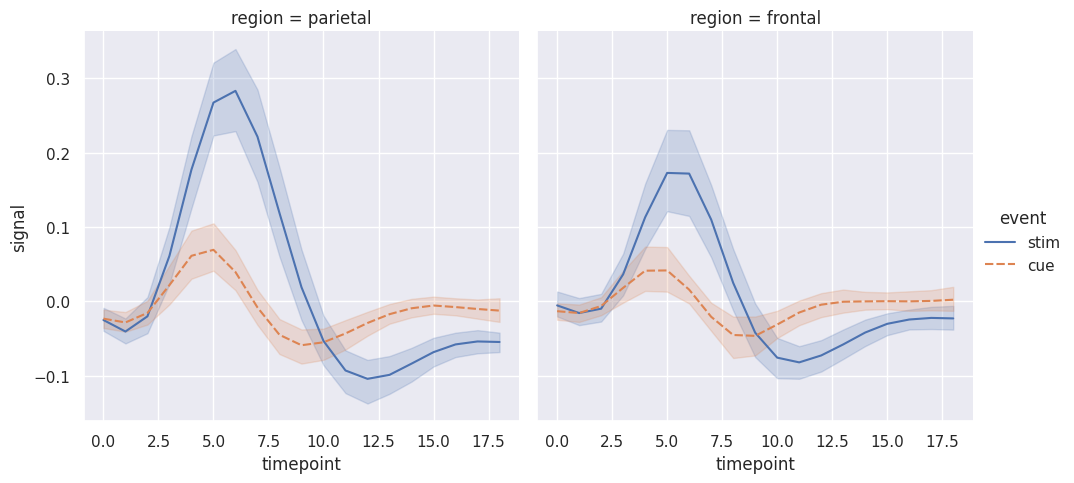

In [173]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Cuando se estiman valores estadísticos, seaborn utilizará bootstrapping para calcular intervalos de confianza y dibujar barras de error que representen la incertidumbre de la estimación.

La estimación estadística en Seaborn va más allá de la estadística descriptiva. Por ejemplo, es posible mejorar un diagrama de dispersión incluyendo un modelo de regresión lineal (y su incertidumbre) utilizando `lmplot`.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


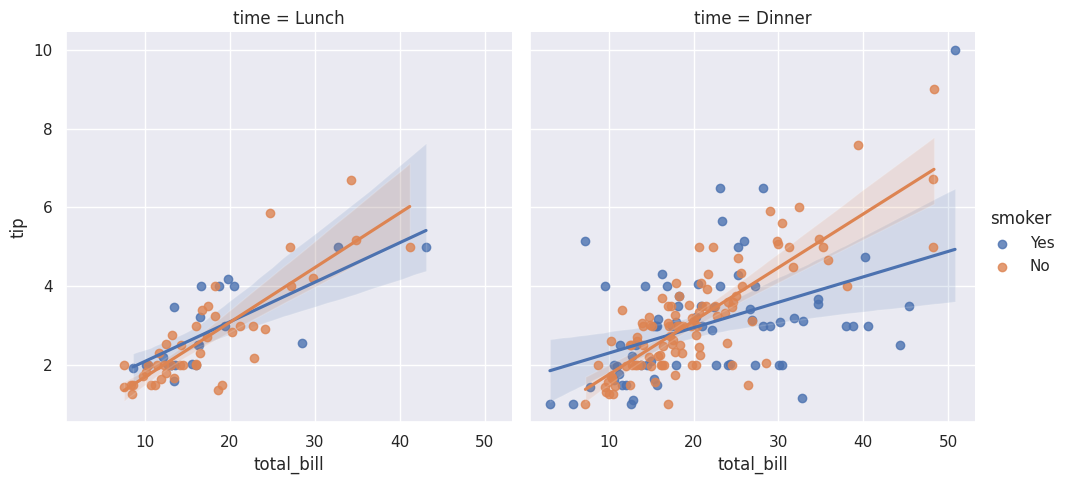

In [175]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

#### Representaciones distributivas

Los análisis estadísticos requieren conocimiento sobre la distribución de variables en el conjunto de datos. La función `displot` seaborn admite varios enfoques para visualizar distribuciones. Estos incluyen técnicas clásicas como histogramas y enfoques computacionalmente intensivos como la estimación de densidad del kernel:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


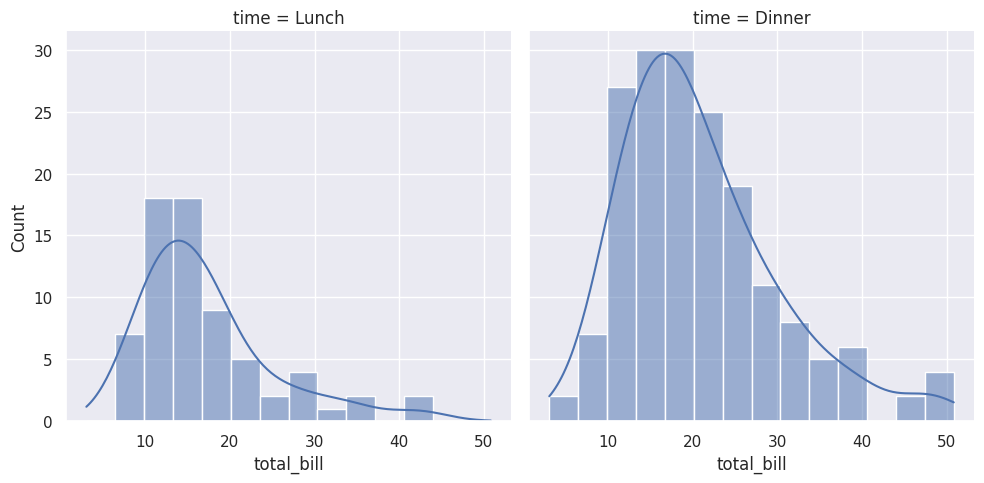

In [172]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn también trata de promover técnicas que son poderosas pero menos familiares, como calcular y trazar la función empírica de distribución acumulativa de los datos:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


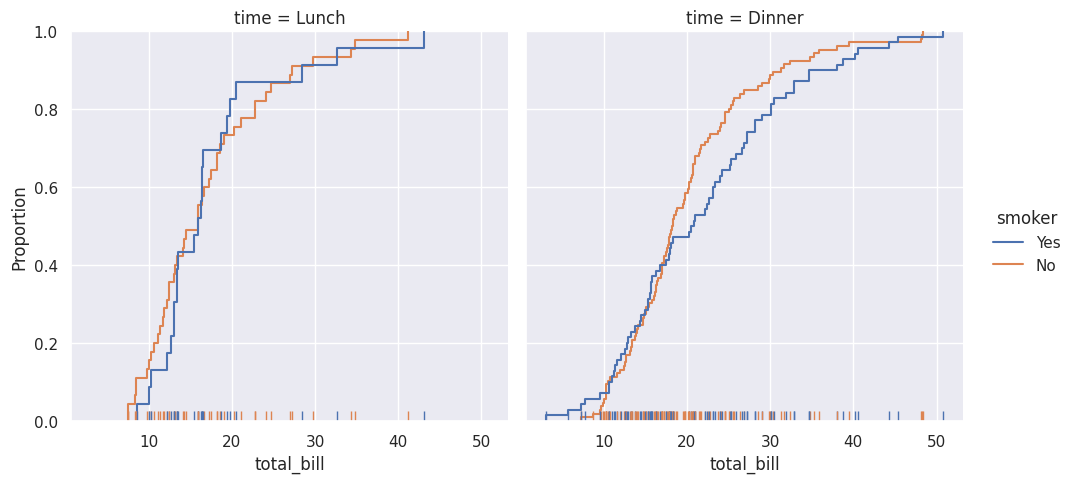

In [178]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

- **Gráficos categóricos**

Varios tipos de gráficos especializadas en seaborn están orientadas a visualizar datos categóricos. Se puede acceder a ellos a través de `catplot()`. Estas gráficas ofrecen diferentes niveles de granularidad. En el nivel más fino, es posible que desee ver cada observación dibujando un diagrama de "enjambre": un diagrama de dispersión que ajusta las posiciones de los puntos a lo largo del eje categórico para que no se superpongan:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


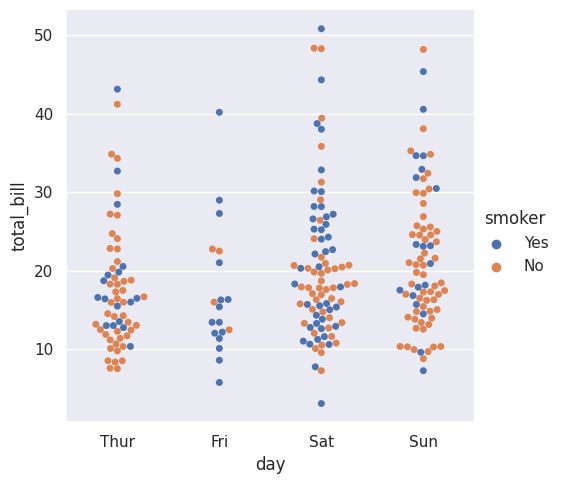

In [179]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

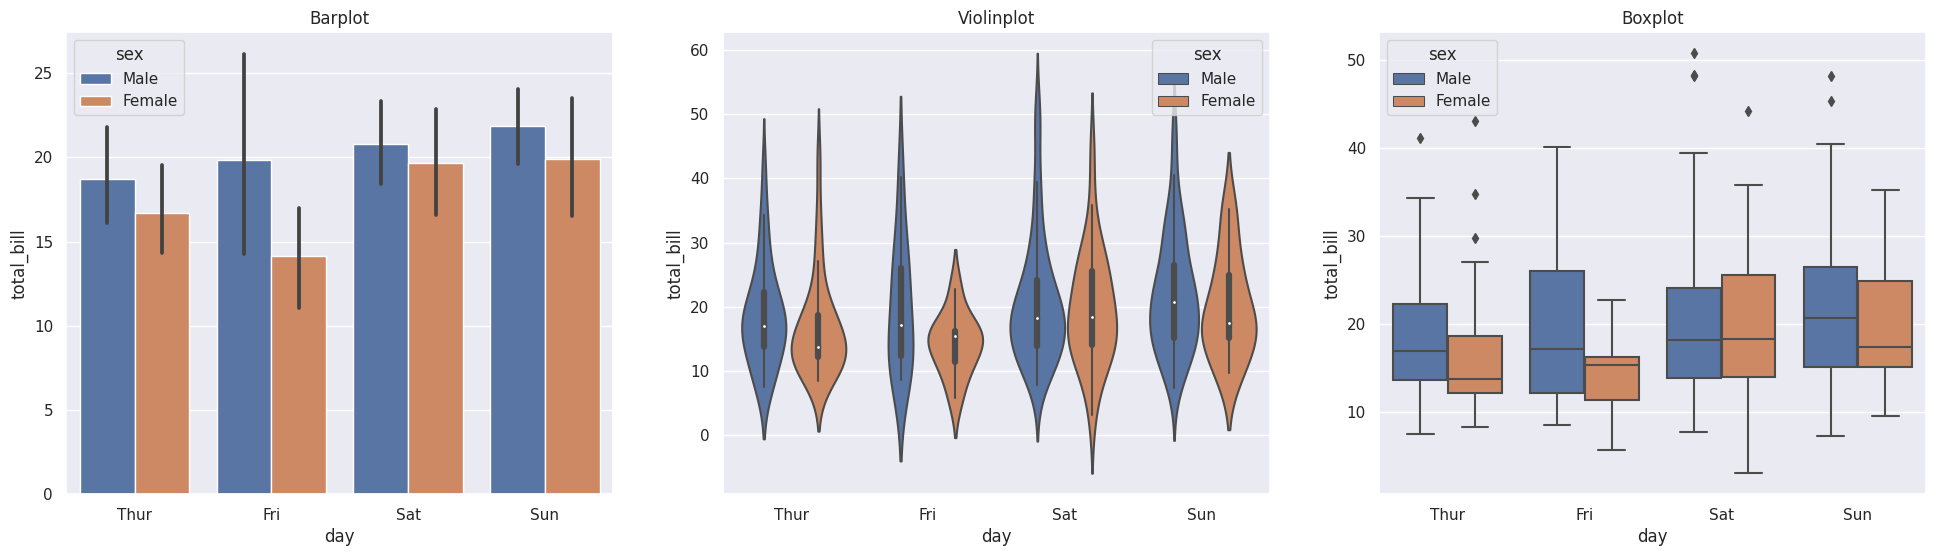

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (24, 6))
sns.barplot(tips, x="day", y = "total_bill", hue = "sex", ax = ax1)
ax1.set_title("Barplot")

sns.violinplot(tips, x="day", y = "total_bill", hue = "sex",   ax = ax2)
ax2.set_title("Violinplot")

sns.boxplot(tips, x="day", y = "total_bill", hue = "sex", ax = ax3)
ax3.set_title("Boxplot")

fig.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


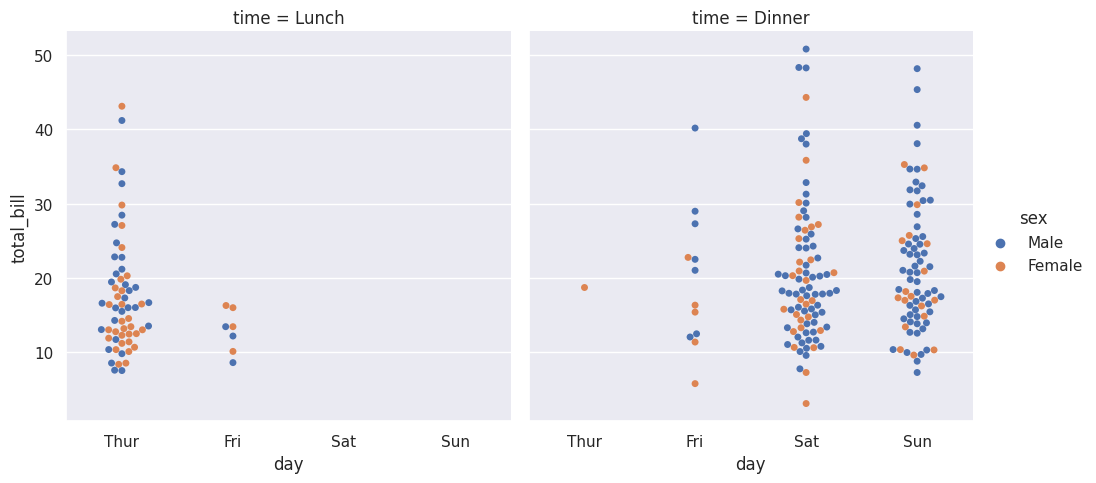

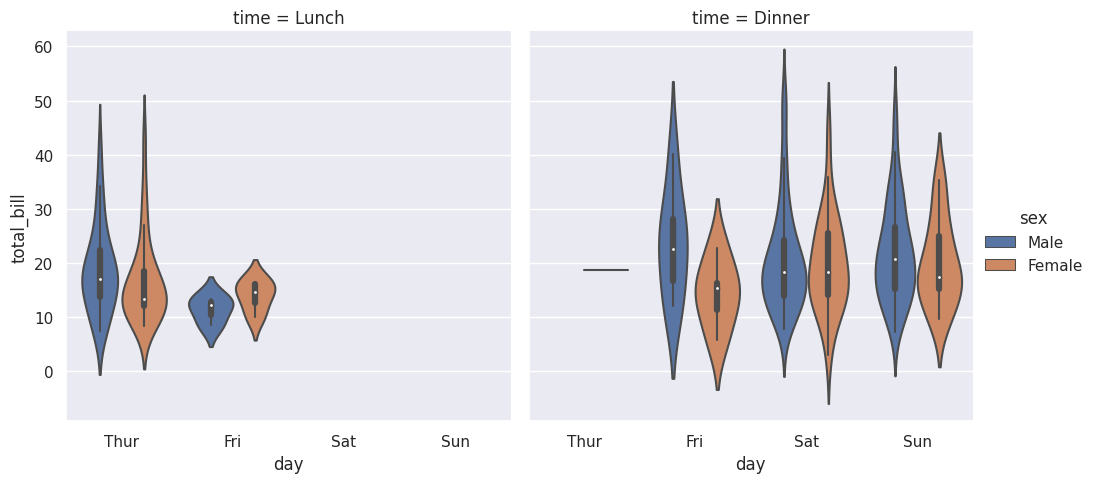

In [26]:
sns.catplot(tips, x="day", y = "total_bill", hue = "sex",  kind = "swarm", col = "time", ax = ax1)
sns.catplot(tips, x="day", y = "total_bill", hue = "sex",  kind = "violin", col = "time", axis = ax2)

#### Vistas multivariantes en conjuntos de datos complejos
Algunas funciones de seaborn combinan múltiples tipos de gráficos para proporcionar rápidamente resúmenes informativos de un conjunto de datos. Uno, `jointplot()`, se centra en una sola relación. Traza la distribución conjunta entre dos variables junto con la distribución marginal de cada variable:

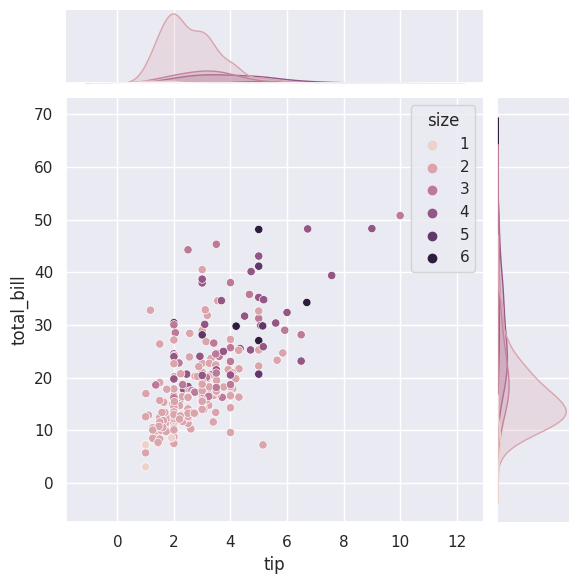

In [186]:
sns.jointplot(data=tips, x="tip", y="total_bill", hue="size")

El otro, `pairplot()`, tiene una visión más amplia: muestra distribuciones conjuntas y marginales para todas las relaciones por pares y para cada variable, respectivamente:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


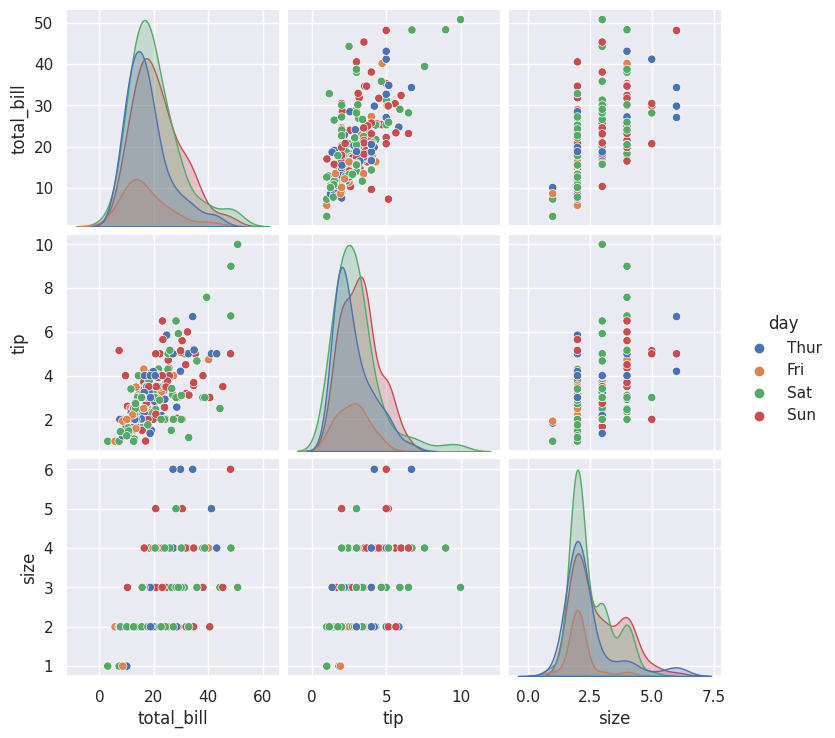

In [189]:
sns.pairplot(data = tips, hue = "day")

##### Herramientas de nivel inferior

Estas herramientas funcionan combinando funciones de trazado a nivel de ejes con objetos que administran el diseño de la figura, vinculando la estructura de un conjunto de datos a una cuadrícula de ejes. Ambos elementos forman parte de la API pública y puede usarlos directamente para crear figuras complejas con solo unas pocas líneas de código más:

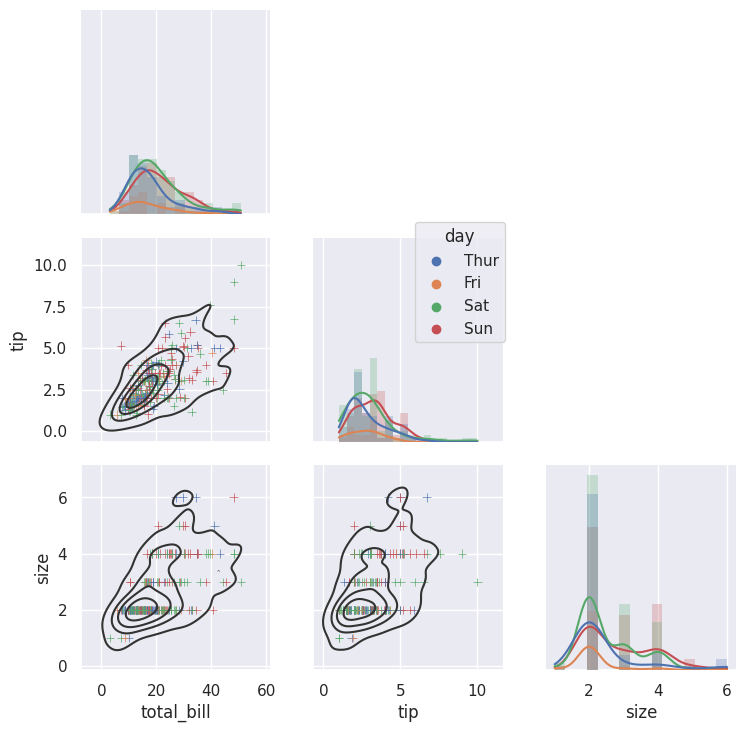

In [190]:
g = sns.PairGrid(tips, hue="day", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

- **Ventajas de Seaborn sobre Matplotlib**
    - Estilos predefinidos.
    - Integración más fácil con pandas DataFrame.



- **Visualización de correlaciones**
    - Matriz de correlación:

<Axes: >

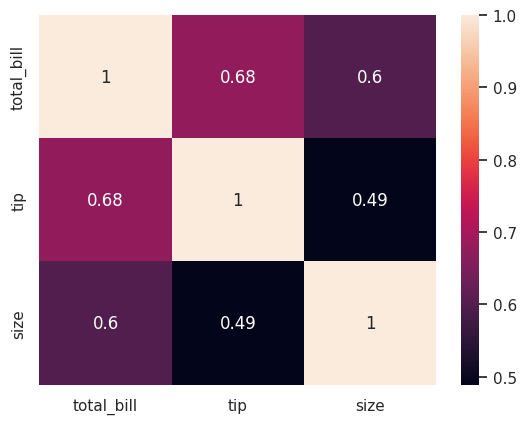

In [28]:
correlation_matrix = tips.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

## Ejemplo
En el siguiente ejemplo usaremos el dataset de `tips`

### Descripción
Un camarero registró información sobre cada propina que recibió durante un Período de unos meses trabajando en un restaurante.

Recogió las siguientes Variables:

propina en dólares,

factura en dólares,

sexo del pagador de la factura,

si había fumadores en la fiesta,

día de la semana,

hora del día,

tamaño de la fiesta.

En total registró 244 consejos. Los datos fueron reportados en una colección de estudios de caso para estadísticas empresariales (Bryant & Smith 1995).


In [29]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


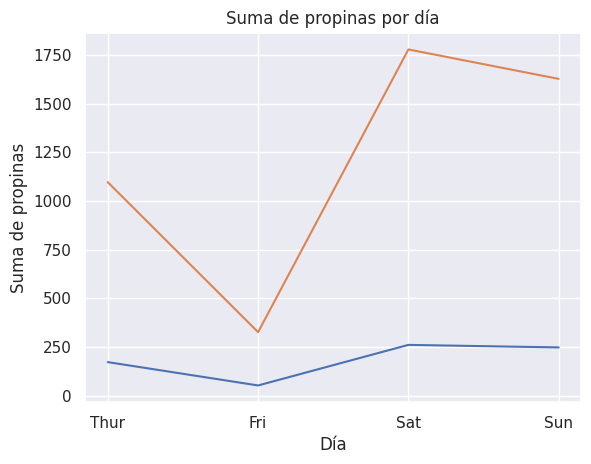

In [30]:
# Graficando la suma de propinas por día
grouped_by_day = df[["day","tip","total_bill"]].groupby('day').sum().reset_index()

plt.plot(grouped_by_day['day'], grouped_by_day['tip'])
plt.plot(grouped_by_day['day'], grouped_by_day['total_bill'])
plt.title('Suma de propinas por día')
plt.xlabel('Día')
plt.ylabel('Suma de propinas')
plt.show()


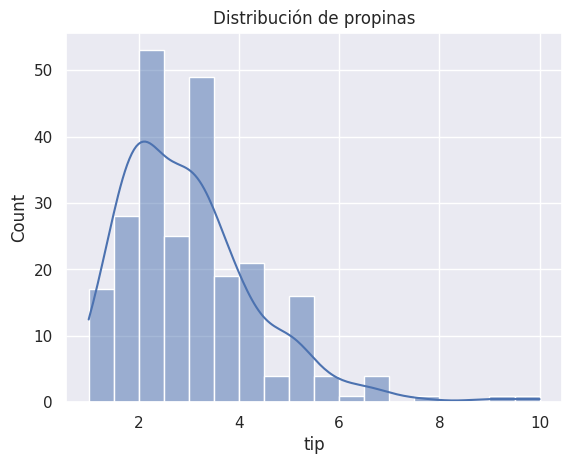

In [31]:
sns.histplot(df['tip'], kde=True)
plt.title('Distribución de propinas')
plt.show()

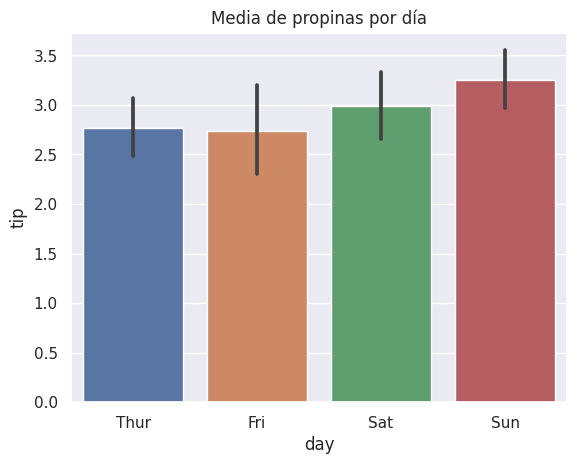

In [32]:
sns.barplot(x='day', y='tip', data=df)
plt.title('Media de propinas por día')
plt.show()

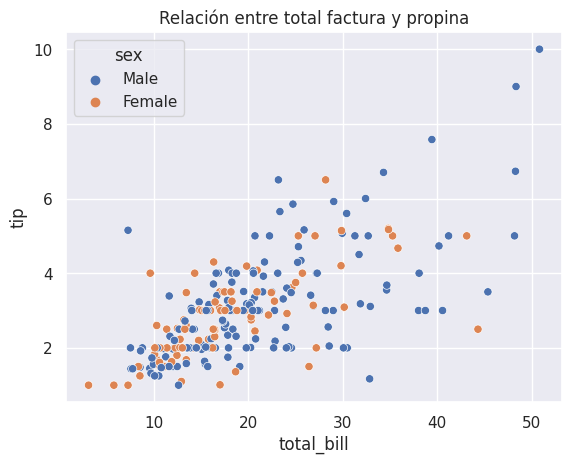

In [33]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex')
plt.title('Relación entre total factura y propina')
plt.show()


**Representaciones multiples**

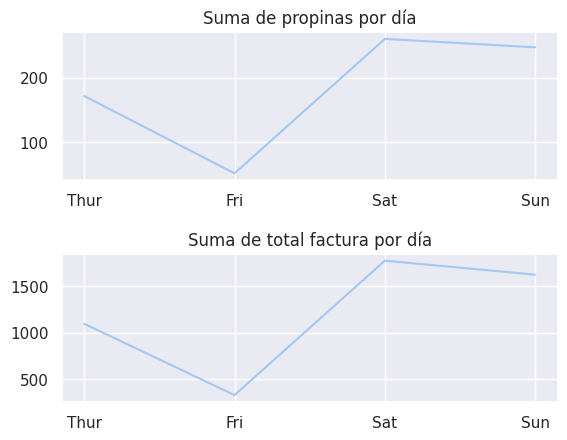

In [35]:
fig, axs = plt.subplots(2)
axs[0].plot(grouped_by_day['day'], grouped_by_day['tip'])
axs[0].set_title('Suma de propinas por día')
axs[1].plot(grouped_by_day['day'], grouped_by_day['total_bill'])
axs[1].set_title('Suma de total factura por día')
plt.subplots_adjust(hspace=0.5)
plt.savefig('suma_de_propinas.png')
plt.show()

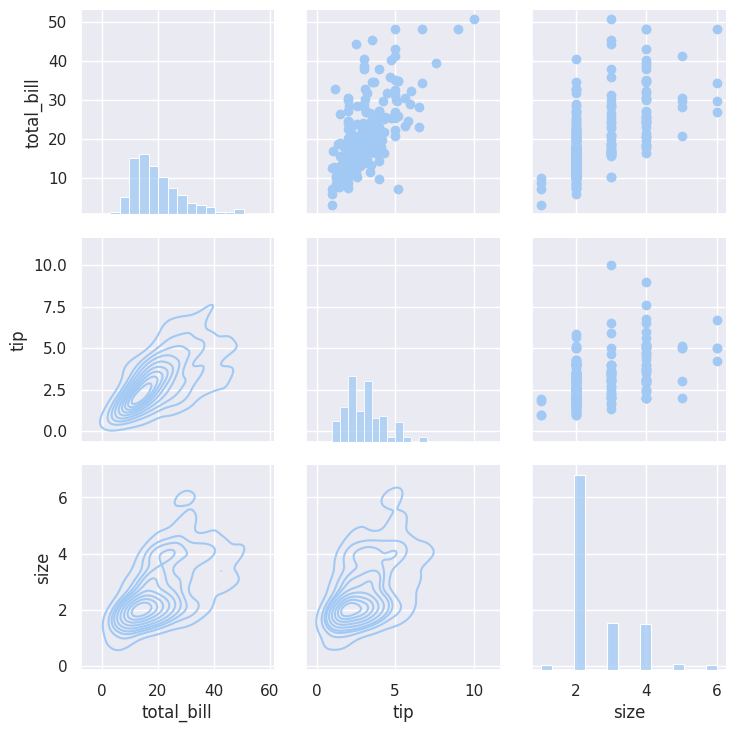

In [36]:
g = sns.PairGrid(df)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.histplot)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


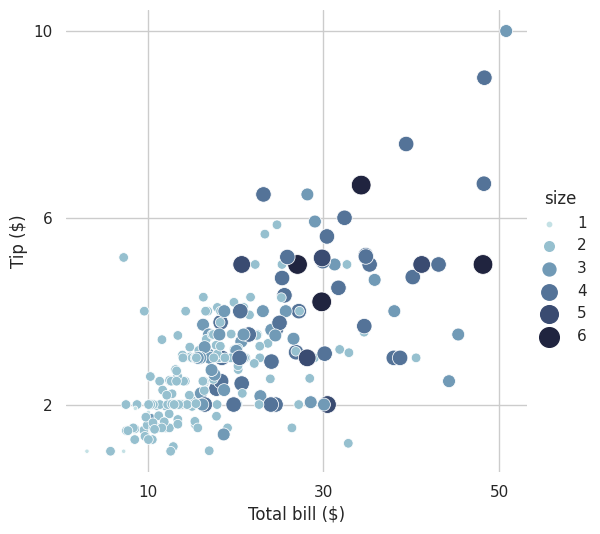

In [37]:
sns.set(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x='total_bill', y='tip', hue='size',
    size='size', sizes=(10, 200),
    palette=cmap, height=5.5, aspect=1
)

g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.despine(left=True, bottom=True)
